In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# line = " " 
# with open("results.csv", 'r') as f:
#     with open("results-new.csv", 'w') as fout:
#         while line != None:
#             # try:
#             line = f.readline()
#             if line[0:6] == "client":
#                 fout.write(line)
#             # except Exception as e:
#             #     f.seek()


In [7]:
df = pd.read_csv("results-new.csv", header=None, delimiter=' ', )
df

,0,1,2
0,client1,1701465886,26716
1,client1,1701465887,26668
2,client1,1701465888,26652
3,client1,1701465889,27184
4,client1,1701465890,26712
...,...,...,...
356521,client2,1701584738,31556
356522,client3,1701584738,31560
356523,client1,1701584739,31550
356524,client2,1701584739,31559


In [8]:
df['client'] = df[0]
df['sec'] = df[1]
df['ms'] = df[2]
df.drop(columns=[0,1,2], inplace=True)

In [9]:
df1 = df[df['client'] == "client1"]
df2 = df[df['client'] == "client2"]
df3 = df[df['client'] == "client3"]

In [10]:
start_time = df['sec'].min()
start_time

1701465886

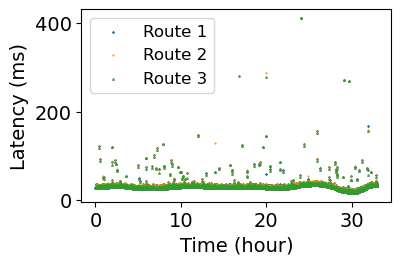

In [69]:
fig, ax = plt.subplots(1,1, figsize=(4,2.5))
ax.scatter((df1["sec"] - start_time)/3600, df1["ms"]/1000, s=1, marker='x', label='Route 1')
ax.scatter((df2["sec"] - start_time)/3600, df2["ms"]/1000, s=1, marker='.', label='Route 2')
ax.scatter((df3["sec"] - start_time)/3600, df3["ms"]/1000, s=1, marker='^', label='Route 3')
ax.legend(fontsize=12)
ax.set_xlabel('Time (hour)', fontsize=14)
ax.set_ylabel('Latency (ms)', fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# ax.set_title('The Distribution of Latency between Two Data Centers')
fig.savefig('latency.pdf', bbox_inches='tight')

In [22]:
df[df['ms'] > 100000].count() / df.count()
np.percentile(df['ms'], [0.1, 99, 99.9, 99.99])

df.count()

client    356526
sec       356526
ms        356526
dtype: int64

In [66]:
df12 = df2.merge(df1, on="sec")
df123 = df12.merge(df3, on='sec')
# df123['maxdiff'] = df.apply(lambda row: max(np.abs(row['ms_x'] - row['ms_y']), np.abs(row['ms_x'] - row['ms']), np.abs(row['ms'] - row['ms_y'])))
df123['maxdiff'] = np.maximum.reduce([
    np.abs(df123['ms_x'] - df123['ms_y']),
    np.abs(df123['ms_x'] - df123['ms']),
    np.abs(df123['ms'] - df123['ms_y'])
])
np.percentile(df123['maxdiff'], [0.1, 99, 99.9, 99.99])


array([6.0000000e+00, 1.3000000e+02, 4.3076520e+03, 7.1578541e+03])